In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Data_science\AI FOLDER\jamb_biology_sample.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6 non-null      object 
 1   Question_Number  5 non-null      float64
 2   Question         5 non-null      object 
 3   Options          5 non-null      object 
 4   Answer           5 non-null      object 
dtypes: float64(1), object(4)
memory usage: 372.0+ bytes


In [4]:
df1=pd.read_csv('SAMPLE.CSV')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Subject          8 non-null      object
 1   Year             8 non-null      int64 
 2   Question_Number  8 non-null      int64 
 3   Question         8 non-null      object
 4   Options          8 non-null      object
 5   Answer           8 non-null      object
dtypes: int64(2), object(4)
memory usage: 516.0+ bytes


In [6]:
df1.columns

Index(['Subject', 'Year', 'Question_Number', 'Question', 'Options', 'Answer'], dtype='object')

In [7]:
df1.isnull().sum()

Subject            0
Year               0
Question_Number    0
Question           0
Options            0
Answer             0
dtype: int64

In [8]:
!pip install sentence-transformers

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
print("Model loaded successfully!")

Model loaded successfully!


In [10]:
embeddings = model.encode(df1["Question"].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

In [12]:
df1["Cluster"] = kmeans.fit_predict(embeddings)

In [13]:
print(df1[["Subject", "Question", "Cluster"]])

       Subject                                           Question  Cluster
0      Biology  Which of the following structures is responsib...        1
1      Biology              The causative organism of malaria is?        1
2    Chemistry             Which of the following is a noble gas?        1
3    Chemistry         The chemical formula of sulphuric acid is?        1
4  Mathematics                     Simplify: 2(3x + 4) - (x - 2).        0
5  Mathematics                     The mean of 2, 4, 6, 8, 10 is?        3
6      English  Choose the word that best completes the senten...        2
7      English    Which of the following is a synonym of 'Happy'?        2


In [14]:
df1["Cluster"]

0    1
1    1
2    1
3    1
4    0
5    3
6    2
7    2
Name: Cluster, dtype: int32

In [15]:

df1.to_csv("waec.csv", index=False)
print("\nClustered questions saved to waec_objectives_clustered.csv")


Clustered questions saved to waec_objectives_clustered.csv


In [16]:
df=pd.read_csv('waec.csv')
df

Subject  Year  Question_Number  \
0      Biology  2022                1   
1      Biology  2022                2   
2    Chemistry  2022                1   
3    Chemistry  2022                2   
4  Mathematics  2022                1   
5  Mathematics  2022                2   
6      English  2022                1   
7      English  2022                2   

                                            Question  \
0  Which of the following structures is responsib...   
1              The causative organism of malaria is?   
2             Which of the following is a noble gas?   
3         The chemical formula of sulphuric acid is?   
4                     Simplify: 2(3x + 4) - (x - 2).   
5                     The mean of 2, 4, 6, 8, 10 is?   
6  Choose the word that best completes the senten...   
7    Which of the following is a synonym of 'Happy'?   

                                             Options Answer  Cluster  
0    A. Trachea | B. Lungs | C. Gills | D. Spiracles      C        1  
1  A. Plasmodium | B. Trypanosoma | C. Taenia | D...      A        1  
2    A. Oxygen | B. Neon | C. Nitrogen | D. Chlorine      B        1  
3              A. H2SO3 | B. H2SO4 | C. H2S | D. H2O      B        1  
4    A. 5x + 6 | B. 5x + 10 | C. 7x + 2 | D. 7x + 10      B        0  
5                          A. 4 | B. 5 | C. 6 | D. 7      C        3  
6               A. go | B. goes | C. went | D. going      C        2  
7          A. Sad | B. Joyful | C. Angry | D. Lonely      B        2

In [17]:
df.columns

Index(['Subject', 'Year', 'Question_Number', 'Question', 'Options', 'Answer',
       'Cluster'],
      dtype='object')

In [18]:
from sklearn.decomposition import PCA

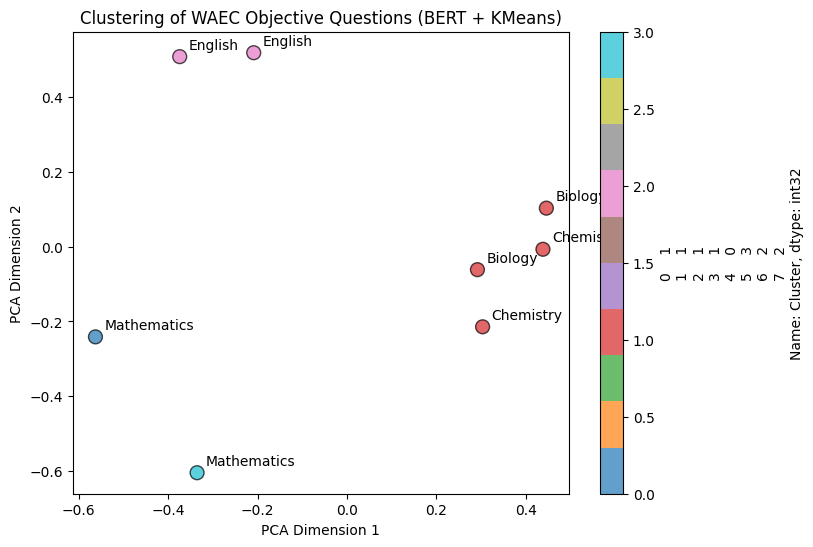

In [19]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# === Plot the clusters ===
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    reduced_embeddings[:, 0], 
    reduced_embeddings[:, 1], 
    c=df1["Cluster"], cmap="tab10", s=100, alpha=0.7, edgecolors="k"
)

# Label points with subject for clarity
for i, txt in enumerate(df["Subject"]):
    plt.annotate(txt, (reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1] + 0.02))

plt.title("Clustering of WAEC Objective Questions (BERT + KMeans)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(scatter, label=df1['Cluster'])
plt.show()

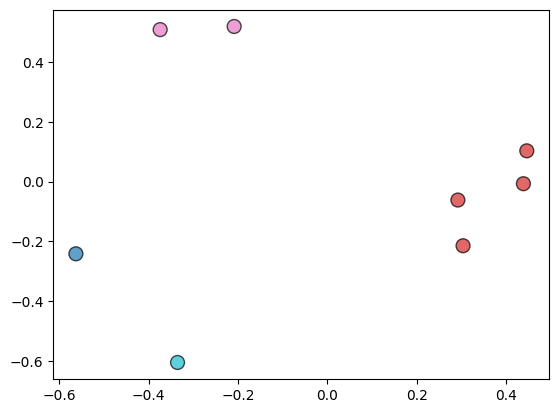

In [20]:
plt.scatter(
    reduced_embeddings[:, 0], 
    reduced_embeddings[:, 1], 
    c=df["Cluster"], cmap="tab10", s=100, alpha=0.7, edgecolors="k"
)

In [21]:
df3=pd.read_csv(r"C:\Users\hp\Desktop\Data_science\AI FOLDER\waec_objectives_200_balanced (1).csv")
df3

Subject  Year  Question_Number  \
0    Biology  2018                1   
1    Biology  2018                2   
2    Biology  2020                3   
3    Biology  2019                4   
4    Biology  2019                5   
..       ...   ...              ...   
195  English  2022               46   
196  English  2018               47   
197  English  2018               48   
198  English  2022               49   
199  English  2019               50   

                                              Question  \
0    In humans, the sex of a child is determined by...   
1     Which process leads to variation during meiosis?   
2          The genotype of an individual refers to the   
3       Sickle-cell anaemia is controlled by a pair of   
4    A backcross between F1 and the recessive paren...   
..                                                 ...   
195                           'Break the ice' means to   
196                             'Cut corners' means to   
197                     'A blessing in disguise' means   
198                              'Piece of cake' means   
199                              'On cloud nine' means   

                                               Options Answer  
0    A. X chromosome | B. Y chromosome | C. XX pair...      B  
1    A. Cytokinesis | B. Crossing over | C. DNA rep...      B  
2    A. outward appearance | B. genetic constitutio...      B  
3    A. multiple alleles | B. co-dominant alleles |...      B  
4    A. test cross | B. out cross | C. selfing | D....      A  
..                                                 ...    ...  
195  A. start a conversation | B. freeze water | C....      A  
196  A. be neat | B. be dishonest to save effort | ...      B  
197  A. good thing that seemed bad | B. a bad omen ...      A  
198  A. dessert | B. something very easy | C. a sma...      B  
199  A. very sad | B. very happy | C. very tired | ...      B  

[200 rows x 6 columns]

In [22]:

model= SentenceTransformer("all-MiniLM-L6-v2")
print("Model loaded successfully!")

Model loaded successfully!


In [23]:
embedding_words= model.encode(df3["Question"].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

In [25]:
df3["Cluster"] = kmeans.fit_predict(embedding_words)

In [26]:
print(df3[["Subject", "Question", "Cluster"]])

     Subject                                           Question  Cluster
0    Biology  In humans, the sex of a child is determined by...        0
1    Biology   Which process leads to variation during meiosis?        0
2    Biology        The genotype of an individual refers to the        0
3    Biology     Sickle-cell anaemia is controlled by a pair of        0
4    Biology  A backcross between F1 and the recessive paren...        0
..       ...                                                ...      ...
195  English                           'Break the ice' means to        3
196  English                             'Cut corners' means to        3
197  English                     'A blessing in disguise' means        3
198  English                              'Piece of cake' means        3
199  English                              'On cloud nine' means        3

[200 rows x 3 columns]


In [27]:
df.Subject.value_counts()

Subject
Biology        2
Chemistry      2
Mathematics    2
English        2
Name: count, dtype: int64

In [28]:
from sklearn.metrics import silhouette_score

import numpy as np

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

# === Helper: keyword extractor ===
def extract_keywords(text, stopwords=set()):
    words = re.findall(r"\b\w+\b", text.lower())
    return [w for w in words if w not in stopwords and len(w) > 3]

stopwords = {
    "the","and","which","that","with","from","this","into","does","have","been",
    "what","when","where","your","their","for","are","was","will","shall","each"
}

# === Pipeline Function ===
def cluster_questions_pipeline(csv_path, out_csv="questions_with_clusters.csv"):
    # Step 1: Load data
    df = pd.read_csv(r"C:\Users\hp\Desktop\Data_science\AI FOLDER\waec_objectives_200_balanced (1).csv")
    print(f" Loaded {len(df)} questions")

    # Step 2: Generate embeddings
    model = SentenceTransformer("all-MiniLM-L6-v2")
    embeddings = model.encode(df["Question"].tolist(), show_progress_bar=True)

    df["Cluster"] = -1  # placeholder

    # Step 3: Cluster per subject
    for subject in df["Subject"].unique():
        mask = df["Subject"] == subject
        X = embeddings[mask.values]

        print(f"\n Subject: {subject} | Questions: {mask.sum()}")
        if len(X) < 3:
            print(" Not enough questions for clustering")
            df.loc[mask, "Cluster"] = 0
            continue

        # Pick best k with silhouette
        best_k, best_score = None, -1
        for k in range(2, min(6, len(X))):  # limit k to avoid errors
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X)
            score = silhouette_score(X, labels)
            print(f"   k={k} → silhouette={score:.3f}")
            if score > best_score:
                best_k, best_score = k, score

        print(f"Best k for {subject}: {best_k} (score={best_score:.3f})")

        # Final clustering
        kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        df.loc[mask, "Cluster"] = labels

        # Step 4: PCA Visualization
        reduced = PCA(n_components=2).fit_transform(X)
        plt.figure(figsize=(8,6))
        plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap="tab10", s=50, alpha=0.7, edgecolors="k")
        plt.title(f"{subject} Clusters (k={best_k}, silhouette={best_score:.3f})")
        plt.xlabel("PCA Dimension 1")
        plt.ylabel("PCA Dimension 2")
        plt.show()

        # Step 5: Cluster Evaluation
        print(f"\n📊 Cluster sizes for {subject}:")
        print(df[df["Subject"] == subject]["Cluster"].value_counts())

        print(f"\n Top keywords per cluster in {subject}:")
        for cluster in sorted(df[df["Subject"] == subject]["Cluster"].unique()):
            cluster_texts = df[(df["Subject"] == subject) & (df["Cluster"] == cluster)]["Question"]
            all_words = []
            for q in cluster_texts:
                all_words.extend(extract_keywords(q, stopwords))
            common = Counter(all_words).most_common(5)
            print(f"   Cluster {cluster}: {common}")

    # Step 6: Save results
    df.to_csv(out_csv, index=False)
    np.save("embeddings.npy", embeddings)

    print(f"\n Pipeline complete! Saved results to {out_csv}")
    return df, embeddings


In [30]:
df

Subject  Year  Question_Number  \
0      Biology  2022                1   
1      Biology  2022                2   
2    Chemistry  2022                1   
3    Chemistry  2022                2   
4  Mathematics  2022                1   
5  Mathematics  2022                2   
6      English  2022                1   
7      English  2022                2   

                                            Question  \
0  Which of the following structures is responsib...   
1              The causative organism of malaria is?   
2             Which of the following is a noble gas?   
3         The chemical formula of sulphuric acid is?   
4                     Simplify: 2(3x + 4) - (x - 2).   
5                     The mean of 2, 4, 6, 8, 10 is?   
6  Choose the word that best completes the senten...   
7    Which of the following is a synonym of 'Happy'?   

                                             Options Answer  Cluster  
0    A. Trachea | B. Lungs | C. Gills | D. Spiracles      C        1  
1  A. Plasmodium | B. Trypanosoma | C. Taenia | D...      A        1  
2    A. Oxygen | B. Neon | C. Nitrogen | D. Chlorine      B        1  
3              A. H2SO3 | B. H2SO4 | C. H2S | D. H2O      B        1  
4    A. 5x + 6 | B. 5x + 10 | C. 7x + 2 | D. 7x + 10      B        0  
5                          A. 4 | B. 5 | C. 6 | D. 7      C        3  
6               A. go | B. goes | C. went | D. going      C        2  
7          A. Sad | B. Joyful | C. Angry | D. Lonely      B        2

In [31]:
df['Cluster'].value_counts()

Cluster
1    4
2    2
0    1
3    1
Name: count, dtype: int64

 Loaded 200 questions


Batches:   0%|          | 0/7 [00:00<?, ?it/s]


 Subject: Biology | Questions: 50
   k=2 → silhouette=0.028
   k=3 → silhouette=0.032
   k=4 → silhouette=0.027
   k=5 → silhouette=0.022
Best k for Biology: 3 (score=0.032)


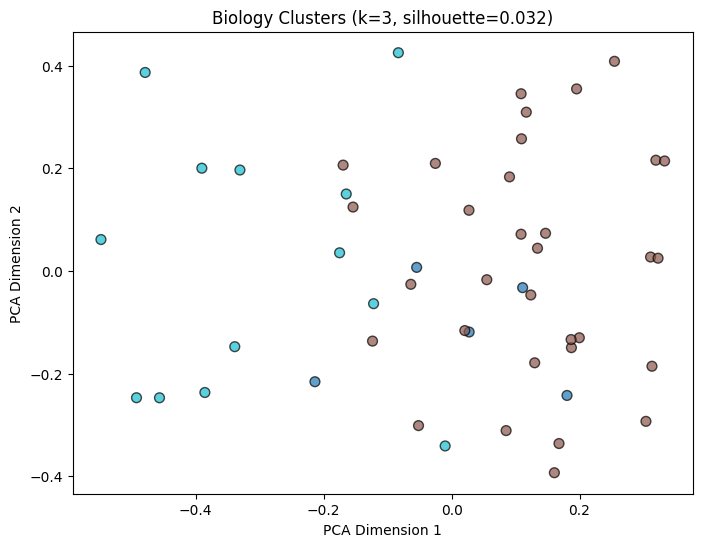


📊 Cluster sizes for Biology:
Cluster
1    32
2    13
0     5
Name: count, dtype: int64

 Top keywords per cluster in Biology:
   Cluster 0: [('biological', 1), ('magnification', 1), ('refers', 1), ('instrument', 1), ('used', 1)]
   Cluster 1: [('following', 4), ('responsible', 3), ('blood', 3), ('water', 2), ('unit', 2)]
   Cluster 2: [('variation', 2), ('refers', 2), ('cell', 2), ('called', 2), ('theory', 2)]

 Subject: Chemistry | Questions: 50
   k=2 → silhouette=0.043
   k=3 → silhouette=0.038
   k=4 → silhouette=0.029
   k=5 → silhouette=0.043
Best k for Chemistry: 2 (score=0.043)


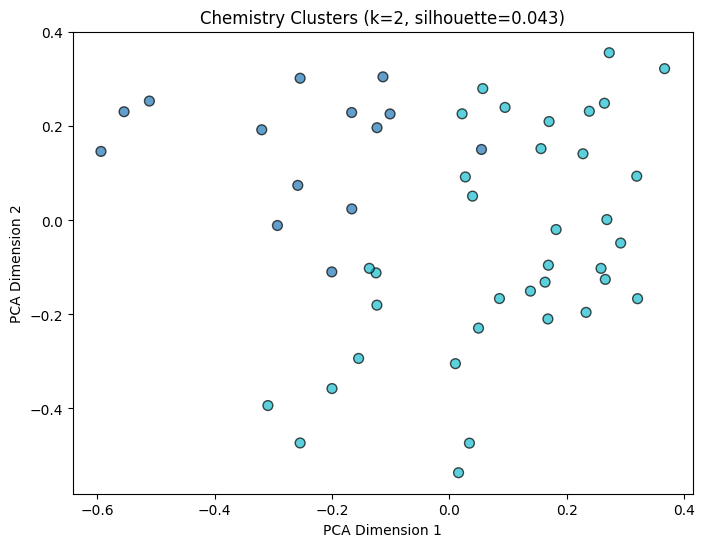


📊 Cluster sizes for Chemistry:
Cluster
1    36
0    14
Name: count, dtype: int64

 Top keywords per cluster in Chemistry:
   Cluster 0: [('reaction', 6), ('rate', 3), ('aldehydes', 2), ('between', 2), ('functional', 1)]
   Cluster 1: [('following', 6), ('water', 5), ('process', 4), ('used', 4), ('strong', 3)]

 Subject: Mathematics | Questions: 50
   k=2 → silhouette=0.223
   k=3 → silhouette=0.328
   k=4 → silhouette=0.430
   k=5 → silhouette=0.452
Best k for Mathematics: 5 (score=0.452)


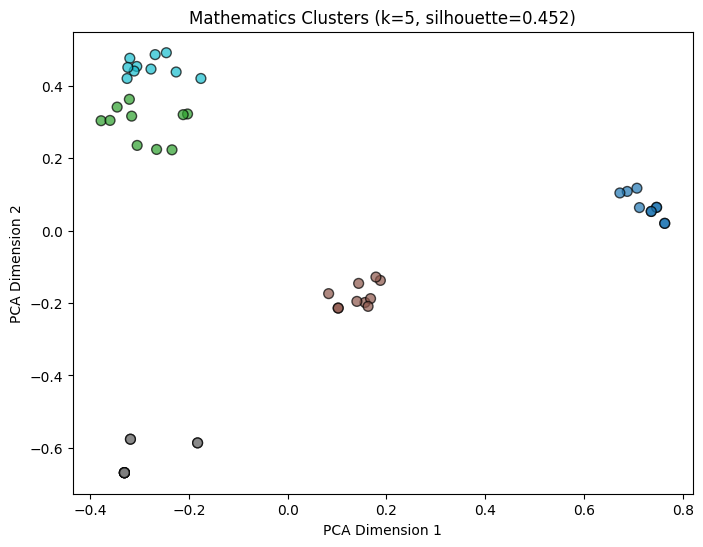


📊 Cluster sizes for Mathematics:
Cluster
1    10
4    10
2    10
0    10
3    10
Name: count, dtype: int64

 Top keywords per cluster in Mathematics:
   Cluster 0: [('contains', 10), ('balls', 10), ('probability', 10), ('picking', 10), ('ball', 10)]
   Cluster 1: [('solve', 10)]
   Cluster 2: [('find', 10)]
   Cluster 3: [('evaluate', 10)]
   Cluster 4: [('simplify', 10)]

 Subject: English | Questions: 50
   k=2 → silhouette=0.042
   k=3 → silhouette=0.047
   k=4 → silhouette=0.054
   k=5 → silhouette=0.056
Best k for English: 5 (score=0.056)


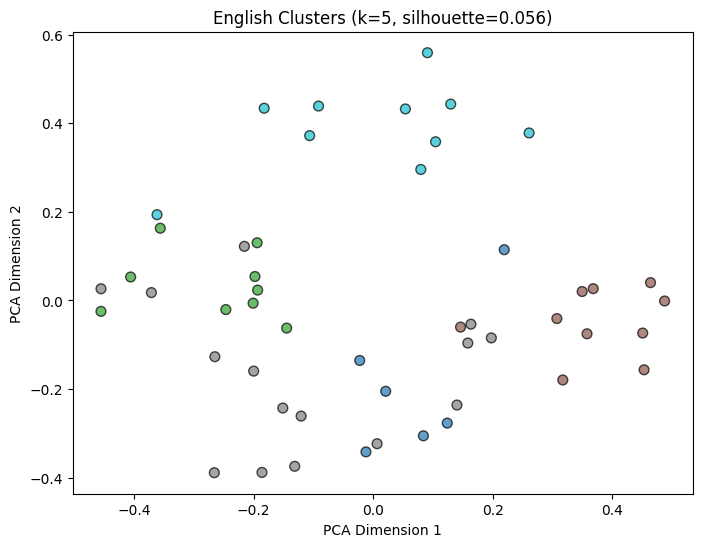


📊 Cluster sizes for English:
Cluster
3    15
4    10
2    10
1     9
0     6
Name: count, dtype: int64

 Top keywords per cluster in English:
   Cluster 0: [('passage', 4), ('author', 2), ('education', 2), ('effects', 2), ('argues', 1)]
   Cluster 1: [('correct', 3), ('choose', 2), ('fill', 2), ('paragraph', 2), ('next', 2)]
   Cluster 2: [('means', 10), ('idiom', 2), ('choose', 1), ('correct', 1), ('kicked', 1)]
   Cluster 3: [('choose', 6), ('meaning', 3), ('correct', 2), ('synonym', 2), ('word', 2)]
   Cluster 4: [('sound', 3), ('select', 2), ('correct', 2), ('pronoun', 1), ('girls', 1)]

 Pipeline complete! Saved results to questions_with_clusters.csv


In [32]:

# Run the full pipeline
df, embeddings = cluster_questions_pipeline("questions.csv")


In [33]:
import joblib


In [34]:
model = joblib.load('model_3_n.pkl')

In [35]:
df.Options

0      A. X chromosome | B. Y chromosome | C. XX pair...
1      A. Cytokinesis | B. Crossing over | C. DNA rep...
2      A. outward appearance | B. genetic constitutio...
3      A. multiple alleles | B. co-dominant alleles |...
4      A. test cross | B. out cross | C. selfing | D....
                             ...                        
195    A. start a conversation | B. freeze water | C....
196    A. be neat | B. be dishonest to save effort | ...
197    A. good thing that seemed bad | B. a bad omen ...
198    A. dessert | B. something very easy | C. a sma...
199    A. very sad | B. very happy | C. very tired | ...
Name: Options, Length: 200, dtype: object

In [36]:
import random
import pandas as pd
import joblib

# Load clustered question bank and model
df = pd.read_csv("questions_with_clusters.csv")
model = joblib.load("model_3_n.pkl")

def run_adaptive_quiz(subject="Biology", n=5, student_features=None):
    # Pick random questions for this quiz
    subset = df[df["Subject"] == subject].sample(n, random_state=random.randint(0, 1000))

    score = 0
    for _, row in subset.iterrows():
        print(f"\nQ: {row['Question']}")

        # Split the options string into A, B, C, D
        opts = row['Options'].split(" | ")
        for opt in opts:
            print(opt.strip())

        ans = input("Your answer (A/B/C/D): ").strip().upper()
        if ans == row["Answer"].strip().upper():
            print(" Correct!")
            score += 1
        else:
            print(f" Wrong! Correct answer is {row['Answer']}")

    print(f"\nFinal Score: {score}/{n}")

    # === Predict performance with supervised model ===
    if student_features is not None:
        pred = model.predict([student_features])[0]
        print(f"\n Predicted Student Performance: {pred}")

        # Recommendation logic
        if pred == "Weak":
            print(" Recommendation: Focus on foundational clusters (easy topics).")
        elif pred == "Average":
            print(" Recommendation: Mix of medium-level clusters.")
        else:
            print(" Recommendation: Attempt advanced/difficult clusters.")


In [37]:
df = pd.read_csv("questions_with_clusters.csv")
df

Subject  Year  Question_Number  \
0    Biology  2018                1   
1    Biology  2018                2   
2    Biology  2020                3   
3    Biology  2019                4   
4    Biology  2019                5   
..       ...   ...              ...   
195  English  2022               46   
196  English  2018               47   
197  English  2018               48   
198  English  2022               49   
199  English  2019               50   

                                              Question  \
0    In humans, the sex of a child is determined by...   
1     Which process leads to variation during meiosis?   
2          The genotype of an individual refers to the   
3       Sickle-cell anaemia is controlled by a pair of   
4    A backcross between F1 and the recessive paren...   
..                                                 ...   
195                           'Break the ice' means to   
196                             'Cut corners' means to   
197                     'A blessing in disguise' means   
198                              'Piece of cake' means   
199                              'On cloud nine' means   

                                               Options Answer  Cluster  
0    A. X chromosome | B. Y chromosome | C. XX pair...      B        2  
1    A. Cytokinesis | B. Crossing over | C. DNA rep...      B        2  
2    A. outward appearance | B. genetic constitutio...      B        2  
3    A. multiple alleles | B. co-dominant alleles |...      B        2  
4    A. test cross | B. out cross | C. selfing | D....      A        2  
..                                                 ...    ...      ...  
195  A. start a conversation | B. freeze water | C....      A        2  
196  A. be neat | B. be dishonest to save effort | ...      B        2  
197  A. good thing that seemed bad | B. a bad omen ...      A        2  
198  A. dessert | B. something very easy | C. a sma...      B        2  
199  A. very sad | B. very happy | C. very tired | ...      B        2  

[200 rows x 7 columns]

from collections import Counter
import re

def extract_keywords(text, stopwords=set()):
    words = re.findall(r"\b\w+\b", text.lower())
    return [w for w in words if w not in stopwords and len(w) > 3]

stopwords = {"the","and","which","that","with","from","this","into","does","have","been","what","when","where","your","their"}

for subject in df["Subject"].unique():
    print(f"\n {subject} Keywords per cluster:")
    for cluster in df[df["Subject"] == subject]["Cluster"].unique():
        cluster_texts = df[(df["Subject"] == subject) & (df["Cluster"] == cluster)]["Question"]
        all_words = []
        for q in cluster_texts:
            all_words.extend(extract_keywords(q, stopwords))
        common = Counter(all_words).most_common(5)
        print(f"    Cluster {cluster}: {common}")


In [38]:

df['difficulty'] = df['Cluster'].map({
    0: 'Easy',
    1: 'Easy',
    2: 'Medium',
    3: 'Medium',
    4: 'Hard'
})


In [60]:
## import joblib

# Load your trained model from file
model = joblib.load("model4.pkl")
def run_adaptive_quiz(subject, model, df, n=3):
    """
    Adaptive quiz that predicts likelihood to pass using student features
    and adjusts it with quiz performance. Starting difficulty is based on G1/G2/G3.
    """
    
    def get_valid_input(prompt, min_val=None, max_val=None):
        """Helper to get valid integer input within optional range."""
        while True:
            try:
                val = int(input(prompt))
                if (min_val is not None and val < min_val) or (max_val is not None and val > max_val):
                    print(f" Please enter a value between {min_val} and {max_val}.")
                    continue
                return val
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    print(f"\n=== Enter your study features for {subject} ===")
    
    # Collect student features
    features = {
        'G1': get_valid_input("First C.A test (0-20): ", 0, 20),
        'G2': get_valid_input("Second C.A test (0-20): ", 0, 20),
        'G3': get_valid_input("Third C.A test (0-20): ", 0, 20)
    }
    
    student_features = [features[key] for key in features]
    
    # Step 1: Assign starting difficulty based on G1/G2/G3 averages
    avg_score = (features['G1'] + features['G2'] + features['G3']) / 3
    if avg_score <= 8:
        difficulty = "Easy"
    elif avg_score <= 14:
        difficulty = "Medium"
    else:
        difficulty = "Hard"
    
    print(f"\n Starting difficulty based on past performance: {difficulty}\n")
    
    # Step 2: Filter questions by subject
    subject_questions = df[df['Subject'] == subject]
    if subject_questions.empty:
        print(f"  No questions available for subject {subject}.")
        return
    
    # Step 3: Adaptive quiz loop
    difficulty_order = ['Easy', 'Medium', 'Hard']
    current_index = difficulty_order.index(difficulty)
    total_correct = 0
    
    for i in range(n):
        pool = subject_questions[subject_questions['difficulty'] == difficulty_order[current_index]]
        if pool.empty:
            print(" No questions available for this difficulty.")
            break
        
        question = pool.sample(1).iloc[0]  # pick random question
        print(f"Q{i+1}: {question['Question']}")
        print(f"Options: {question['Options']}")
        
        # Ask for student answer and validate
        valid_options = ['A','B','C','D']
        while True:
            student_answer = input("Your answer (A/B/C/D): ").strip().upper()
            if student_answer in valid_options:
                break
            print(" Invalid option. Please enter A, B, C, or D.")
        
        # Check correctness
        correct = student_answer == question['Answer'].strip().upper()
        if correct:
            print(" Correct!\n")
            total_correct += 1
            current_index = min(current_index + 1, 2)  # move harder
        else:
            print(f" Wrong! Correct answer: {question['Answer']}\n")
            current_index = max(current_index - 1, 0)  # move easier
    
    # Step 4: Compute quiz score
    quiz_score = total_correct / n
    print(f" Quiz Completed! Score: {quiz_score*100:.1f}%")
    
    # Step 5: Final likelihood to pass using Option 2
    base_prob = model.predict_proba([student_features])[0,1]  # original 11-feature model
    final_prob = 0.6 * base_prob + 0.4 * quiz_score
    
    if final_prob >= 0.7:
        result = "Likely to Pass"
    elif final_prob >= 0.4:
        result = "At Risk"
    else:
        result = "Likely to Fail"
    
    print(f"\n Final Prediction: {result} (Score: {final_prob:.2f})")


In [62]:

# Now run the adaptive quiz
run_adaptive_quiz("English", model, df, n=3)


=== Enter your study features for English ===


First C.A test (0-20):  3
Second C.A test (0-20):  3
Third C.A test (0-20):  3



 Starting difficulty based on past performance: Easy

Q1: Choose the correct tense: They ___ to Lagos every weekend.
Options: A. goes | B. go | C. going | D. gone


Your answer (A/B/C/D):  b


 Correct!

Q2: 'Once in a blue moon' means
Options: A. very often | B. rarely | C. never | D. always


Your answer (A/B/C/D):  b


 Correct!

Q3: 'Judge' begins with the sound
Options: A. /dʒ/ | B. /ʃ/ | C. /tʃ/ | D. /z/


Your answer (A/B/C/D):  a


 Correct!

 Quiz Completed! Score: 100.0%

 Final Prediction: At Risk (Score: 0.40)


In [70]:
import pandas as pd
import joblib

# --- Load trained G1/G2/G3 model ---
model4 = joblib.load("model4.pkl")  # make sure path is correct

# --- Adaptive cluster selector ---
def pick_next_cluster(last_cluster, last_correct):
    if last_correct:
        next_cluster = min(last_cluster + 1, df["Cluster"].max())
    else:
        next_cluster = max(last_cluster - 1, 0)
    return next_cluster

# --- Adaptive Quiz with Likely WAEC Grade ---
def run_adaptive_quiz(subject, df, n=3):
    
    def get_valid_input(prompt, min_val=None, max_val=None):
        while True:
            try:
                val = int(input(prompt))
                if (min_val is not None and val < min_val) or (max_val is not None and val > max_val):
                    print(f"⚠️ Enter a value between {min_val} and {max_val}")
                    continue
                return val
            except ValueError:
                print("⚠️ Invalid input, enter a number")
    
    # Step 1: Collect G1/G2/G3
    print(f"\n=== Enter your past scores for {subject} ===")
    G1 = get_valid_input("First C.A test (0-20): ", 0, 20)
    G2 = get_valid_input("Second C.A test (0-20): ", 0, 20)
    G3 = get_valid_input("Third C.A test (0-20): ", 0, 20)
    
    student_g123 = [[G1, G2, G3]]
    
    # Step 2: Predict starting cluster from model4
    pred_grade = model4.predict(student_g123)[0]
    grade_to_cluster = {'F':0, 'D':1, 'C':2, 'B':3, 'A':4}
    current_cluster = grade_to_cluster.get(pred_grade, 2)  # default medium
    
    print(f"\n📊 Predicted starting grade: {pred_grade}, starting cluster: {current_cluster}")
    
    # Step 3: Filter questions by subject
    subject_questions = df[df['Subject'] == subject]
    if subject_questions.empty:
        print(f" No questions available for {subject}")
        return
    
    # Step 4: Adaptive quiz loop
    total_correct = 0
    for i in range(n):
        pool = subject_questions[subject_questions['Cluster'] == current_cluster]
        if pool.empty:
            print(" No questions available for this cluster")
            break
        
        question = pool.sample(1).iloc[0]
        print(f"\nQ{i+1}: {question['Question']}")
        print(f"Options: {question['Options']}")
        
        valid_options = ['A','B','C','D']
        while True:
            ans = input("Your answer (A/B/C/D): ").strip().upper()
            if ans in valid_options:
                break
            print("Invalid input, enter A/B/C/D")
        
        correct = ans == question['Answer'].strip().upper()
        if correct:
            print(" Correct!")
            total_correct += 1
        else:
            print(f"❌ Wrong! Correct answer: {question['Answer']}")
        
        # Step 5: Update cluster
        current_cluster = pick_next_cluster(current_cluster, correct)
    
    # Step 6: Compute quiz score
    quiz_score = total_correct / n
    print(f"\n📊 Quiz Completed! Score: {quiz_score*100:.1f}%")
    
    # Step 7: Estimate WAEC grade
    # We can combine model4 prediction and quiz performance
    # Map quiz_score to a simple numeric scale for blending
    score_to_numeric = quiz_score * 20  # convert 0-1 to 0-20 scale
    avg_g123 = (G1 + G2 + G3) / 3
    combined_score = 0.6 * avg_g123 + 0.4 * score_to_numeric
    
    # Map combined_score to WAEC grade
    if combined_score >= 16:
        likely_grade = 'A'
    elif combined_score >= 13:
        likely_grade = 'B'
    elif combined_score >= 10:
        likely_grade = 'C'
    elif combined_score >= 7:
        likely_grade = 'D'
    else:
        likely_grade = 'F'
    
    print(f"🎯 Likely WAEC grade based on quiz & past scores: {likely_grade}")


In [71]:
#run_adaptive_quiz("Mathematics", df, n=3)
run_adaptive_quiz("English", df, n=4)



=== Enter your past scores for English ===


First C.A test (0-20):  13
Second C.A test (0-20):  13
Third C.A test (0-20):  13



📊 Predicted starting grade: 1, starting cluster: 2

Q1: 'Under the weather' means
Options: A. travelling | B. feeling unwell | C. outdoors | D. excited


Your answer (A/B/C/D):  A


❌ Wrong! Correct answer: B

Q2: The minimal pair is
Options: A. ship/sheep | B. cat/dog | C. man/men | D. thin/think


Your answer (A/B/C/D):  B


❌ Wrong! Correct answer: A

Q3: If the author argues that education reduces poverty, the main idea is that
Options: A. schools are expensive | B. education has no value | C. education alleviates poverty | D. teachers earn more


Your answer (A/B/C/D):  C


 Correct!

Q4: A paragraph that starts with 'First, Next, Finally' is organized
Options: A. spatially | B. chronologically | C. randomly | D. point-by-point


Your answer (A/B/C/D):  C


❌ Wrong! Correct answer: B

📊 Quiz Completed! Score: 25.0%
🎯 Likely WAEC grade based on quiz & past scores: D


In [75]:
run_adaptive_quiz("Mathematics", df, n=4)



=== Enter your past scores for English ===


First C.A test (0-20):  20
Second C.A test (0-20):  20
Third C.A test (0-20):  20



📊 Predicted starting grade: 0, starting cluster: 2 (Medium)

Q1 (Medium): 'Break the ice' means to
Options: A. start a conversation | B. freeze water | C. fight | D. sing


Your answer (A/B/C/D):  c


❌ Wrong! Correct answer: A

Q2 (Easy): A paragraph that starts with 'First, Next, Finally' is organized
Options: A. spatially | B. chronologically | C. randomly | D. point-by-point


Your answer (A/B/C/D):  c


❌ Wrong! Correct answer: B

Q3 (Easy): A passage states: 'The policy had unintended effects.' This implies the effects were
Options: A. deliberate | B. accidental | C. beneficial | D. planned


Your answer (A/B/C/D):  c


❌ Wrong! Correct answer: B

Q4 (Easy): An author's bias in a passage refers to
Options: A. the setting | B. the point of view/slant | C. the grammar | D. the length


Your answer (A/B/C/D):  c


❌ Wrong! Correct answer: B

📊 Quiz Completed! Score: 0.0%
🎯 Based solely on quiz performance: At Risk / Likely to Fail


In [76]:
import pandas as pd
import joblib

# --- Load trained G1/G2/G3 model ---
model4 = joblib.load("model4.pkl")  # ensure correct path

# --- Adaptive cluster selector ---
def pick_next_cluster(last_cluster, last_correct, max_cluster):
    if last_correct:
        return min(last_cluster + 1, max_cluster)
    else:
        return max(last_cluster - 1, 0)

# --- Map cluster to difficulty ---
def cluster_to_difficulty(cluster):
    if cluster <= 1:
        return "Easy"
    elif cluster <= 3:
        return "Medium"
    else:
        return "Hard"

# --- Fully Adaptive Quiz ---
def run_adaptive_quiz(subject, df_questions):
    
    def get_valid_input(prompt, min_val=0, max_val=20):
        while True:
            try:
                val = int(input(prompt))
                if val < min_val or val > max_val:
                    print(f"⚠️ Enter a value between {min_val} and {max_val}")
                    continue
                return val
            except ValueError:
                print("⚠️ Invalid input, enter a number")
    
    # Step 1: Collect G1/G2/G3
    print(f"\n=== Enter your past scores for {subject} ===")
    G1 = get_valid_input("First C.A test (0-20): ")
    G2 = get_valid_input("Second C.A test (0-20): ")
    G3 = get_valid_input("Third C.A test (0-20): ")
    
    # Step 2: Predict starting cluster from G1/G2/G3
    student_g123 = [[G1, G2, G3]]
    pred_grade = model4.predict(student_g123)[0]
    grade_to_cluster = {'F':0, 'D':1, 'C':2, 'B':3, 'A':4}
    current_cluster = grade_to_cluster.get(pred_grade, 2)
    
    print(f"\n📊 Predicted starting grade: {pred_grade}, starting cluster: {current_cluster} ({cluster_to_difficulty(current_cluster)})")
    
    # Step 3: Filter questions by subject
    subject_questions = df_questions[df_questions['Subject'] == subject]
    if subject_questions.empty:
        print(f"⚠️ No questions available for {subject}")
        return
    
    max_cluster = subject_questions['Cluster'].max()
    total_questions = 0
    total_correct = 0
    
    # Step 4: Continuous adaptive quiz
    while True:
        pool = subject_questions[subject_questions['Cluster'] == current_cluster]
        if pool.empty:
            print("⚠️ No questions available for this cluster")
            break
        
        question = pool.sample(1).iloc[0]
        difficulty = cluster_to_difficulty(current_cluster)
        print(f"\nQ{total_questions+1} ({difficulty}): {question['Question']}")
        print(f"Options: {question['Options']}")
        
        valid_options = ['A','B','C','D']
        while True:
            ans = input("Your answer (A/B/C/D or Q to quit): ").strip().upper()
            if ans == 'Q':
                print("🛑 Quiz ended by user.")
                break
            if ans in valid_options:
                break
            print("⚠️ Invalid input, enter A/B/C/D or Q to quit")
        if ans == 'Q':
            break
        
        correct = ans == question['Answer'].strip().upper()
        if correct:
            print("✅ Correct!")
            total_correct += 1
        else:
            print(f"❌ Wrong! Correct answer: {question['Answer']}")
        
        total_questions += 1
        current_cluster = pick_next_cluster(current_cluster, correct, max_cluster)
    
    if total_questions == 0:
        print("No questions attempted.")
        return
    
    # Step 5: Compute quiz score
    quiz_score = total_correct / total_questions
    print(f"\n📊 Quiz Completed! Score: {quiz_score*100:.1f}% ({total_correct}/{total_questions})")
    
    # Step 6: Predict Likely Pass / Fail based on quiz score only
    if quiz_score >= 0.5:
        result = "Likely to Pass"
    else:
        result = "At Risk / Likely to Fail"
    
    print(f"🎯 Based solely on quiz performance: {result}")


In [79]:
run_adaptive_quiz("English", df)



=== Enter your past scores for English ===


First C.A test (0-20):  3
Second C.A test (0-20):  3
Third C.A test (0-20):  3



📊 Predicted starting grade: 4, starting cluster: 2 (Medium)

Q1 (Medium): 'Once in a blue moon' means
Options: A. very often | B. rarely | C. never | D. always


Your answer (A/B/C/D or Q to quit):  a


❌ Wrong! Correct answer: B

Q2 (Easy): Identify the error: He did not went there yesterday.
Options: A. did not went | B. went there | C. yesterday | D. He


Your answer (A/B/C/D or Q to quit):  a


✅ Correct!

Q3 (Medium): Choose the correct idiom: He kicked the bucket means he
Options: A. broke a bucket | B. became angry | C. died | D. lost money


Your answer (A/B/C/D or Q to quit):  a


❌ Wrong! Correct answer: C

Q4 (Easy): If a paragraph ends with 'Therefore', the next sentence will most likely present
Options: A. an example | B. a conclusion | C. a definition | D. a story


Your answer (A/B/C/D or Q to quit):  c


❌ Wrong! Correct answer: B

Q5 (Easy): Primary stress in 'education' falls on
Options: A. first | B. second | C. third | D. fourth


Your answer (A/B/C/D or Q to quit):  a


❌ Wrong! Correct answer: C

Q6 (Easy): An author's bias in a passage refers to
Options: A. the setting | B. the point of view/slant | C. the grammar | D. the length


Your answer (A/B/C/D or Q to quit):  b


✅ Correct!

Q7 (Easy): Identify the error: He did not went there yesterday.
Options: A. did not went | B. went there | C. yesterday | D. He


Your answer (A/B/C/D or Q to quit):  b


❌ Wrong! Correct answer: A

Q8 (Easy): A passage states: 'The policy had unintended effects.' This implies the effects were
Options: A. deliberate | B. accidental | C. beneficial | D. planned


Your answer (A/B/C/D or Q to quit):  b


✅ Correct!

Q9 (Easy): Fill the gap: He has lived here ___ 2019.
Options: A. since | B. for | C. from | D. in


Your answer (A/B/C/D or Q to quit):  b


❌ Wrong! Correct answer: A

Q10 (Easy): If the author argues that education reduces poverty, the main idea is that
Options: A. schools are expensive | B. education has no value | C. education alleviates poverty | D. teachers earn more


Your answer (A/B/C/D or Q to quit):  b


❌ Wrong! Correct answer: C

Q11 (Easy): Primary stress in 'education' falls on
Options: A. first | B. second | C. third | D. fourth


Your answer (A/B/C/D or Q to quit):  b


❌ Wrong! Correct answer: C

Q12 (Easy): A 'counter-argument' in a passage is
Options: A. the thesis | B. an opposing point | C. a summary | D. a definition


Your answer (A/B/C/D or Q to quit):  c


❌ Wrong! Correct answer: B

Q13 (Easy): An author's bias in a passage refers to
Options: A. the setting | B. the point of view/slant | C. the grammar | D. the length


Your answer (A/B/C/D or Q to quit):  a


❌ Wrong! Correct answer: B

Q14 (Easy): A passage states: 'The policy had unintended effects.' This implies the effects were
Options: A. deliberate | B. accidental | C. beneficial | D. planned


Your answer (A/B/C/D or Q to quit):  b


✅ Correct!

Q15 (Easy): Fill the gap: He has lived here ___ 2019.
Options: A. since | B. for | C. from | D. in


Your answer (A/B/C/D or Q to quit):  c


❌ Wrong! Correct answer: A

Q16 (Easy): Primary stress in 'education' falls on
Options: A. first | B. second | C. third | D. fourth


Your answer (A/B/C/D or Q to quit):  c


✅ Correct!

Q17 (Easy): The minimal pair is
Options: A. ship/sheep | B. cat/dog | C. man/men | D. thin/think


Your answer (A/B/C/D or Q to quit):  a


✅ Correct!

Q18 (Medium): 'On cloud nine' means
Options: A. very sad | B. very happy | C. very tired | D. very angry


Your answer (A/B/C/D or Q to quit):  c


❌ Wrong! Correct answer: B

Q19 (Easy): Choose the correct option: Neither James nor his friends ___ going today.
Options: A. is | B. are | C. be | D. were


Your answer (A/B/C/D or Q to quit):  c


❌ Wrong! Correct answer: B

Q20 (Easy): 'The tone of the passage is satirical' means it is
Options: A. serious | B. mocking | C. boring | D. neutral


Your answer (A/B/C/D or Q to quit):  a


❌ Wrong! Correct answer: B

Q21 (Easy): Primary stress in 'education' falls on
Options: A. first | B. second | C. third | D. fourth


Your answer (A/B/C/D or Q to quit):  Q


🛑 Quiz ended by user.

📊 Quiz Completed! Score: 30.0% (6/20)
🎯 Based solely on quiz performance: At Risk / Likely to Fail
